# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Perform Weather Check
weatherlist={}

for index in range(0,len(cities)):
    city=cities[index]
    print (f'processing record |{city}')
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={weather_api_key}'   

    response=requests.get(url)

    if response.status_code==200:

        weather_data=response.json()

        city_weather=[
            city,
            weather_data['clouds']['all'],
            weather_data['sys']['country'],
            weather_data['dt'],
            weather_data['main']['humidity'],
            weather_data['coord']['lat'],
            weather_data['coord']['lon'],
            weather_data['main']['temp_max'],
            weather_data['wind']['speed']
        ]
        
        weatherlist[index]=city_weather
    else:
        print('city not found. skipping')
print('------------------------------------------------------------')
print('data retrieval complete')
print('------------------------------------------------------------')

processing record |raduzhnyy
processing record |longyearbyen
processing record |ushuaia
processing record |dikson
processing record |lagoa
processing record |barentsburg
city not found. skipping
processing record |mar del plata
processing record |taolanaro
city not found. skipping
processing record |mataura
processing record |hithadhoo
processing record |husavik
processing record |naze
processing record |yellowknife
processing record |sept-iles
processing record |hualmay
processing record |rikitea
processing record |khor
processing record |grasse
processing record |albany
processing record |santiago del estero
processing record |khatanga
processing record |punta arenas
processing record |ankang
processing record |hilo
processing record |vaini
processing record |nikolskoye
processing record |lysyanka
processing record |memphis
processing record |atuona
processing record |gijon
processing record |jamestown
processing record |severo-kurilsk
processing record |taoudenni
processing record |

processing record |camacha
processing record |senneterre
processing record |madera
processing record |flin flon
processing record |dauphin
processing record |olafsvik
processing record |zyryanka
processing record |bengkalis
city not found. skipping
processing record |mporokoso
processing record |nishihara
processing record |amga
processing record |dubovskoye
processing record |chegutu
processing record |rivera
processing record |praia da vitoria
processing record |warqla
city not found. skipping
processing record |san patricio
processing record |college
processing record |inuvik
processing record |los llanos de aridane
processing record |planaltina
processing record |gurupi
processing record |te anau
processing record |caibarien
processing record |linxia
processing record |zhaotong
processing record |jalu
processing record |guerrero negro
processing record |kautokeino
processing record |eyl
processing record |lasa
processing record |tres arroyos
processing record |wahran
city not found

processing record |mount gambier
processing record |port keats
processing record |kaseda
processing record |maneadero
processing record |syamzha
processing record |wasilla
processing record |glace bay
processing record |preobrazheniye
processing record |simplicio mendes
processing record |attawapiskat
city not found. skipping
processing record |issum
processing record |sid
processing record |valparaiso
processing record |vostok
processing record |copperas cove
processing record |kununurra
processing record |takoradi
processing record |zlotoryja
processing record |yeppoon
processing record |rungata
city not found. skipping
processing record |narsaq
processing record |seymchan
processing record |luau
processing record |mys shmidta
city not found. skipping
processing record |almeirim
processing record |portland
processing record |nusaybin
processing record |beidao
processing record |bandarbeyla
processing record |saint-georges
processing record |maxixe
processing record |umm jarr
city not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Export City Data into a csv and Display the DataFrame
df=pd.DataFrame.from_dict(weatherlist,orient='index',columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
df.to_csv(output_data_file, ",",header=True,columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'],index=True,index_label='City_ID')
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,raduzhnyy,100,RU,1603736415,96,62.10,77.47,24.46,10.96
1,longyearbyen,75,SJ,1603736415,79,78.22,15.64,23.00,11.41
2,ushuaia,40,AR,1603736350,33,-54.80,-68.30,59.00,18.34
3,dikson,99,RU,1603736415,95,73.51,80.55,12.34,14.41
4,lagoa,6,PT,1603736415,87,39.05,-27.98,67.71,24.40
...,...,...,...,...,...,...,...,...,...
595,varzea alegre,14,BR,1603736511,23,-5.35,-40.38,99.82,6.04
596,todos santos,2,MX,1603736511,64,23.45,-110.22,79.00,8.01
597,bonthe,93,SL,1603736512,80,7.53,-12.51,81.84,8.95
598,urumqi,0,CN,1603736293,56,43.80,87.60,41.00,4.47


In [5]:
# Describe the DataFrame
df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,544.000000,5.440000e+02,544.000000,544.000000,544.000000,544.000000,544.000000
mean,55.088235,1.603736e+09,72.391544,20.680956,14.404136,58.610294,7.863603
std,38.733014,6.938024e+01,21.364917,32.976503,91.334501,22.627923,5.370421
min,0.000000,1.603736e+09,8.000000,-54.800000,-179.170000,-1.680000,0.360000
25%,14.000000,1.603736e+09,62.000000,-5.567500,-68.352500,44.700000,3.700000
50%,71.500000,1.603736e+09,78.000000,27.670000,18.825000,63.000000,6.780000
75%,90.000000,1.603736e+09,88.000000,46.720000,96.190000,77.000000,10.965000
max,100.000000,1.603737e+09,100.000000,78.220000,178.420000,100.110000,30.360000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

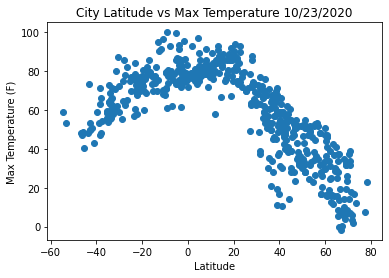

In [8]:
# Scatter Plot Lattitude vs Temperature
x=df['Lat']
y=df['Max Temp']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature 10/23/2020')
plt.show()

## Latitude vs. Humidity Plot

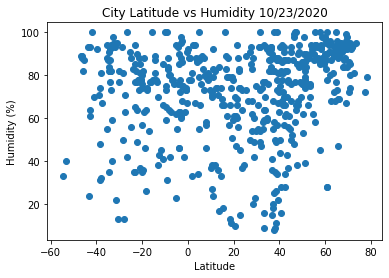

In [9]:
# Scatter Plot Lattitude vs Humidity
x=df['Lat']
y=df['Humidity']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity 10/23/2020')
plt.show()

## Latitude vs. Cloudiness Plot

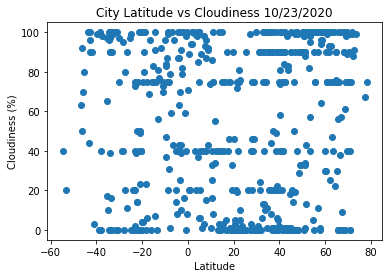

In [10]:
# Scatter Plot Lattitude vs Cloudiness
x=df['Lat']
y=df['Cloudiness']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness 10/23/2020')
plt.show()

## Latitude vs. Wind Speed Plot

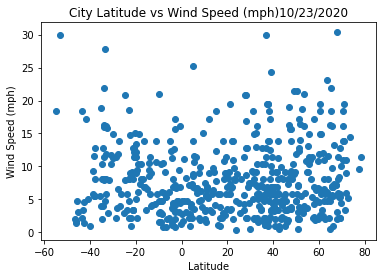

In [11]:
# Scatter Plot Lattitude vs Wind Speed
x=df['Lat']
y=df['Wind Speed']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph)10/23/2020')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R value is  -0.8708870799956085


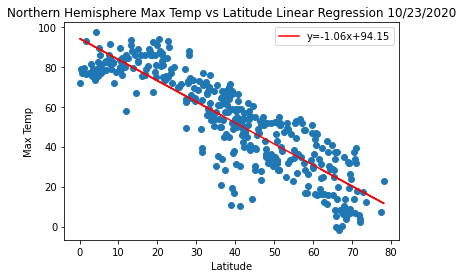

In [21]:
#Northern Hemisphere Scatter Plot with Linear Regression: Max Temp vs. Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Max Temp']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Northern Hemisphere Max Temp vs Latitude Linear Regression 10/23/2020')
plt.legend(fontsize=10)
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

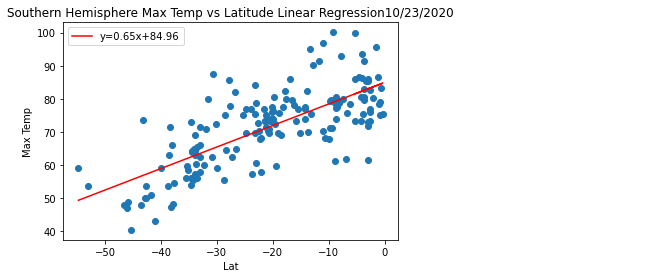

In [23]:
#Creates and saves scatterplot
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-",label='y={:.2f}x+{:.2f}'.format(slope,intercept))
# plt.annotate(line_eq,(0,0.4),fontsize=15,color="red")
plt.annotate(r,((0.35*df['Lat'].max()),(0.8*df['Max Temp'].max())),fontsize=12,color="red")
plt.annotate(p,((0.35*df['Lat'].max()),(0.7*df['Max Temp'].max())), fontsize=12, color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere Max Temp vs Latitude Linear Regression10/23/2020')
plt.legend(fontsize=10)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R value is  0.2808924125499811


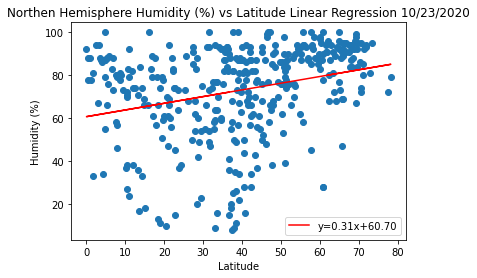

In [24]:
#Scatter Plot with Linear Regression line for the Northern Hemisphere Humidity vs Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Humidity']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Northen Hemisphere Humidity (%) vs Latitude Linear Regression 10/23/2020')
plt.legend(fontsize=10)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R value is  0.009040329765442428


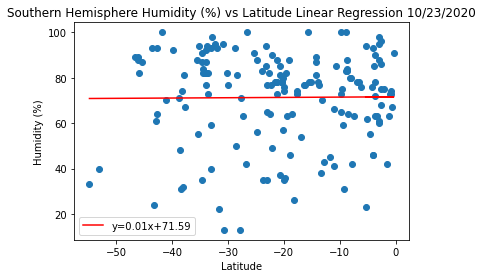

In [25]:
#Scatter Plot with Linear Regression line for the Southern Hemisphere Humidity vs Latitude
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Humidity']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Southern Hemisphere Humidity (%) vs Latitude Linear Regression 10/23/2020')
plt.legend(fontsize=10)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R value is  0.1990492274699257


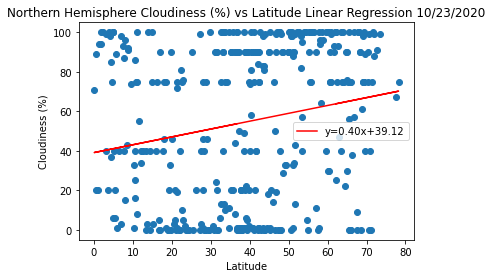

In [26]:
#Scatter Plot with Linear Regression line for the Northern Hemisphere Cloudiness(%) vs Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Cloudiness']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Northern Hemisphere Cloudiness (%) vs Latitude Linear Regression 10/23/2020')
plt.legend(fontsize=10)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R value is  0.03117908754546511


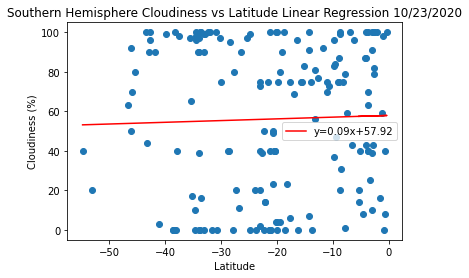

In [27]:
#Scatter Plot with Linear Regression line for the Southern Hemisphere Cloudiness(%) vs Latitude
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Cloudiness']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Southern Hemisphere Cloudiness vs Latitude Linear Regression 10/23/2020')
plt.legend(fontsize=10)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R value is  0.13917425877669262


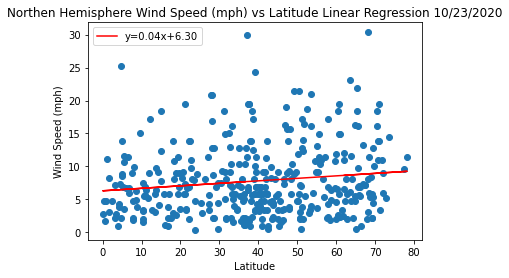

In [28]:
#Scatter Plot with Linear Regression line for the Northern Hemisphere Wind Speed vs Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Wind Speed']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Northen Hemisphere Wind Speed (mph) vs Latitude Linear Regression 10/23/2020')
plt.legend(fontsize=10)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R value is  -0.2155494111912281


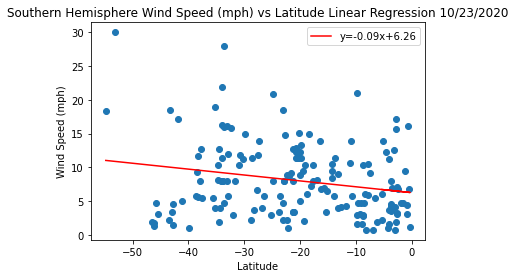

In [29]:
#Scatter Plot with Linear Regression line for the Southern Hemisphere Wind Speed vs Latitude
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Wind Speed']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Southern Hemisphere Wind Speed (mph) vs Latitude Linear Regression 10/23/2020')
plt.legend(fontsize=10)
plt.show()